# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Clean & Preprocess Data

In [5]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [6]:
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

In [8]:
cat_cols = data.select_dtypes(include=["object"]).columns
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


# Train-Test Split

In [9]:
X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1 — Logistic Regression

In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1036
           1       0.72      0.32      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.64      0.65      1409
weighted avg       0.78      0.79      0.75      1409



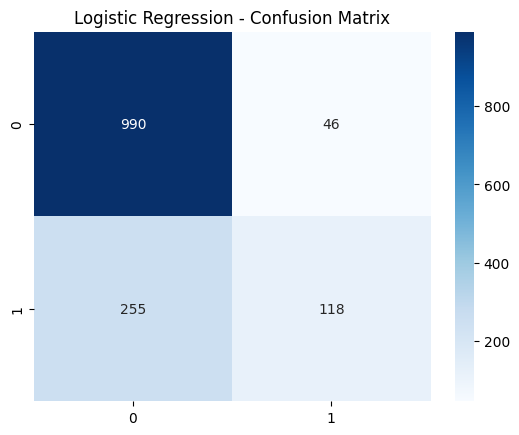

In [12]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# MODEL 2 — Decision Tree

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.50      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409



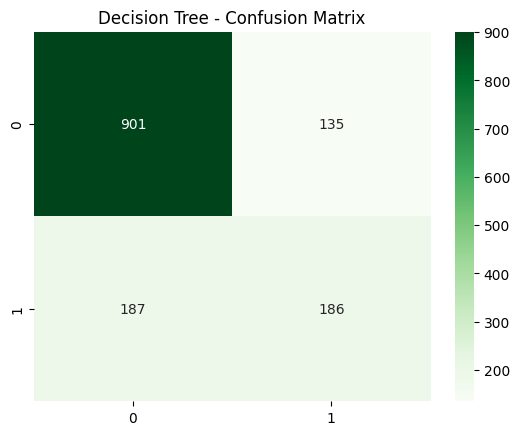

In [14]:
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# MODEL 3 — Random Forest

In [21]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



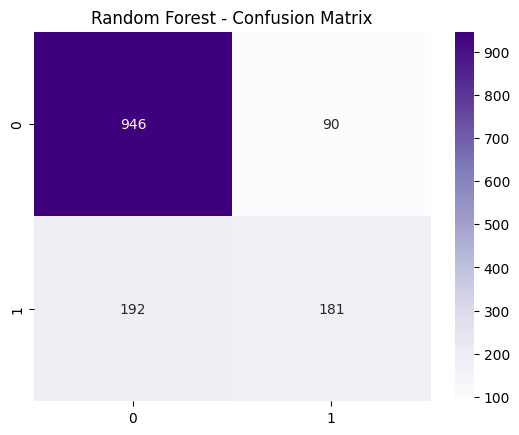

In [22]:
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# MODEL 4 — XGBoost

In [18]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

XGBoost Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



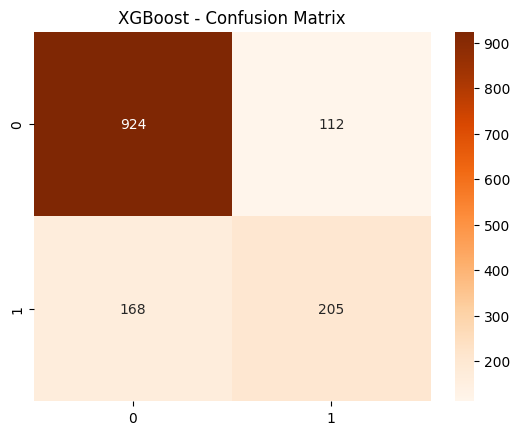

In [19]:
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.show()

# Model Comparison

In [23]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
})

results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.786373,0.719512,0.316354,0.439479
1,Decision Tree,0.771469,0.579439,0.498660,0.536023
2,Random Forest,0.799858,0.667897,0.485255,0.562112
3,XGBoost,0.801278,0.646688,0.549598,0.594203


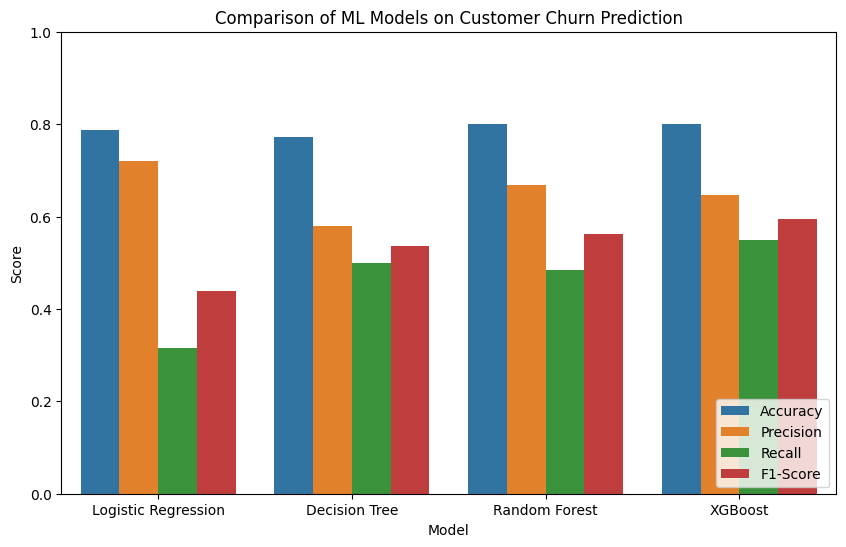

In [25]:
results_melted = results.melt(id_vars="Model",  value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)
plt.ylim(0, 1)
plt.title("Comparison of ML Models on Customer Churn Prediction")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()


# XGBoost is the best model, predicting churn most accurately. Random Forest is close, Decision Tree is okay, and Logistic Regression misses many churns.